In [1]:
import matplotlib.pylab as pl
%matplotlib inline
import numpy as np0
import cPickle as pickle
import sys
sys.path.append('../associative_retrieval')
from facility import *
from generate_data import reconstruct
from rnn import FastWeightRNN

In [2]:
N_SAMPLES = 10
validation_X, validation_Y = pickle.load(open('../associative_retrieval/validation', 'rb'))
validation_X, validation_Y = validation_X[:N_SAMPLES], validation_Y[:N_SAMPLES]

In [3]:
hidden = 20
model = FastWeightRNN(128, hidden, 10, 1)
lr = 0.02
path = 'parameters/retrieval-hidden-%d-lr-%6f-parameters' % (hidden, lr)
model.params = pickle.load(open(path, 'rb'))

In [4]:
X = validation_X
Y = np0.argmax(to_np(model.forward(X, 'train')), axis=1)
for i in range(N_SAMPLES):
    i, o = reconstruct(X[i], Y[i])
    print i, o

U1W4R7P6??P 6
Y8A1I4X3??X 3
K4D7F1H5??F 1
Z9D3I6M1??M 1
J0K8A6S1??S 1
P6V8F7J3??F 7
N8D7F0V9??N 4
R8V6X0N5??N 5
M1Z0W5Q7??Z 0
A5I2P0S8??P 0


In [13]:
hidden_states = map(to_np, model.previous_h)
h_array = np0.vstack(h[0].flatten() for h in hidden_states).astype(np0.float)
h_array.shape

(12, 20)

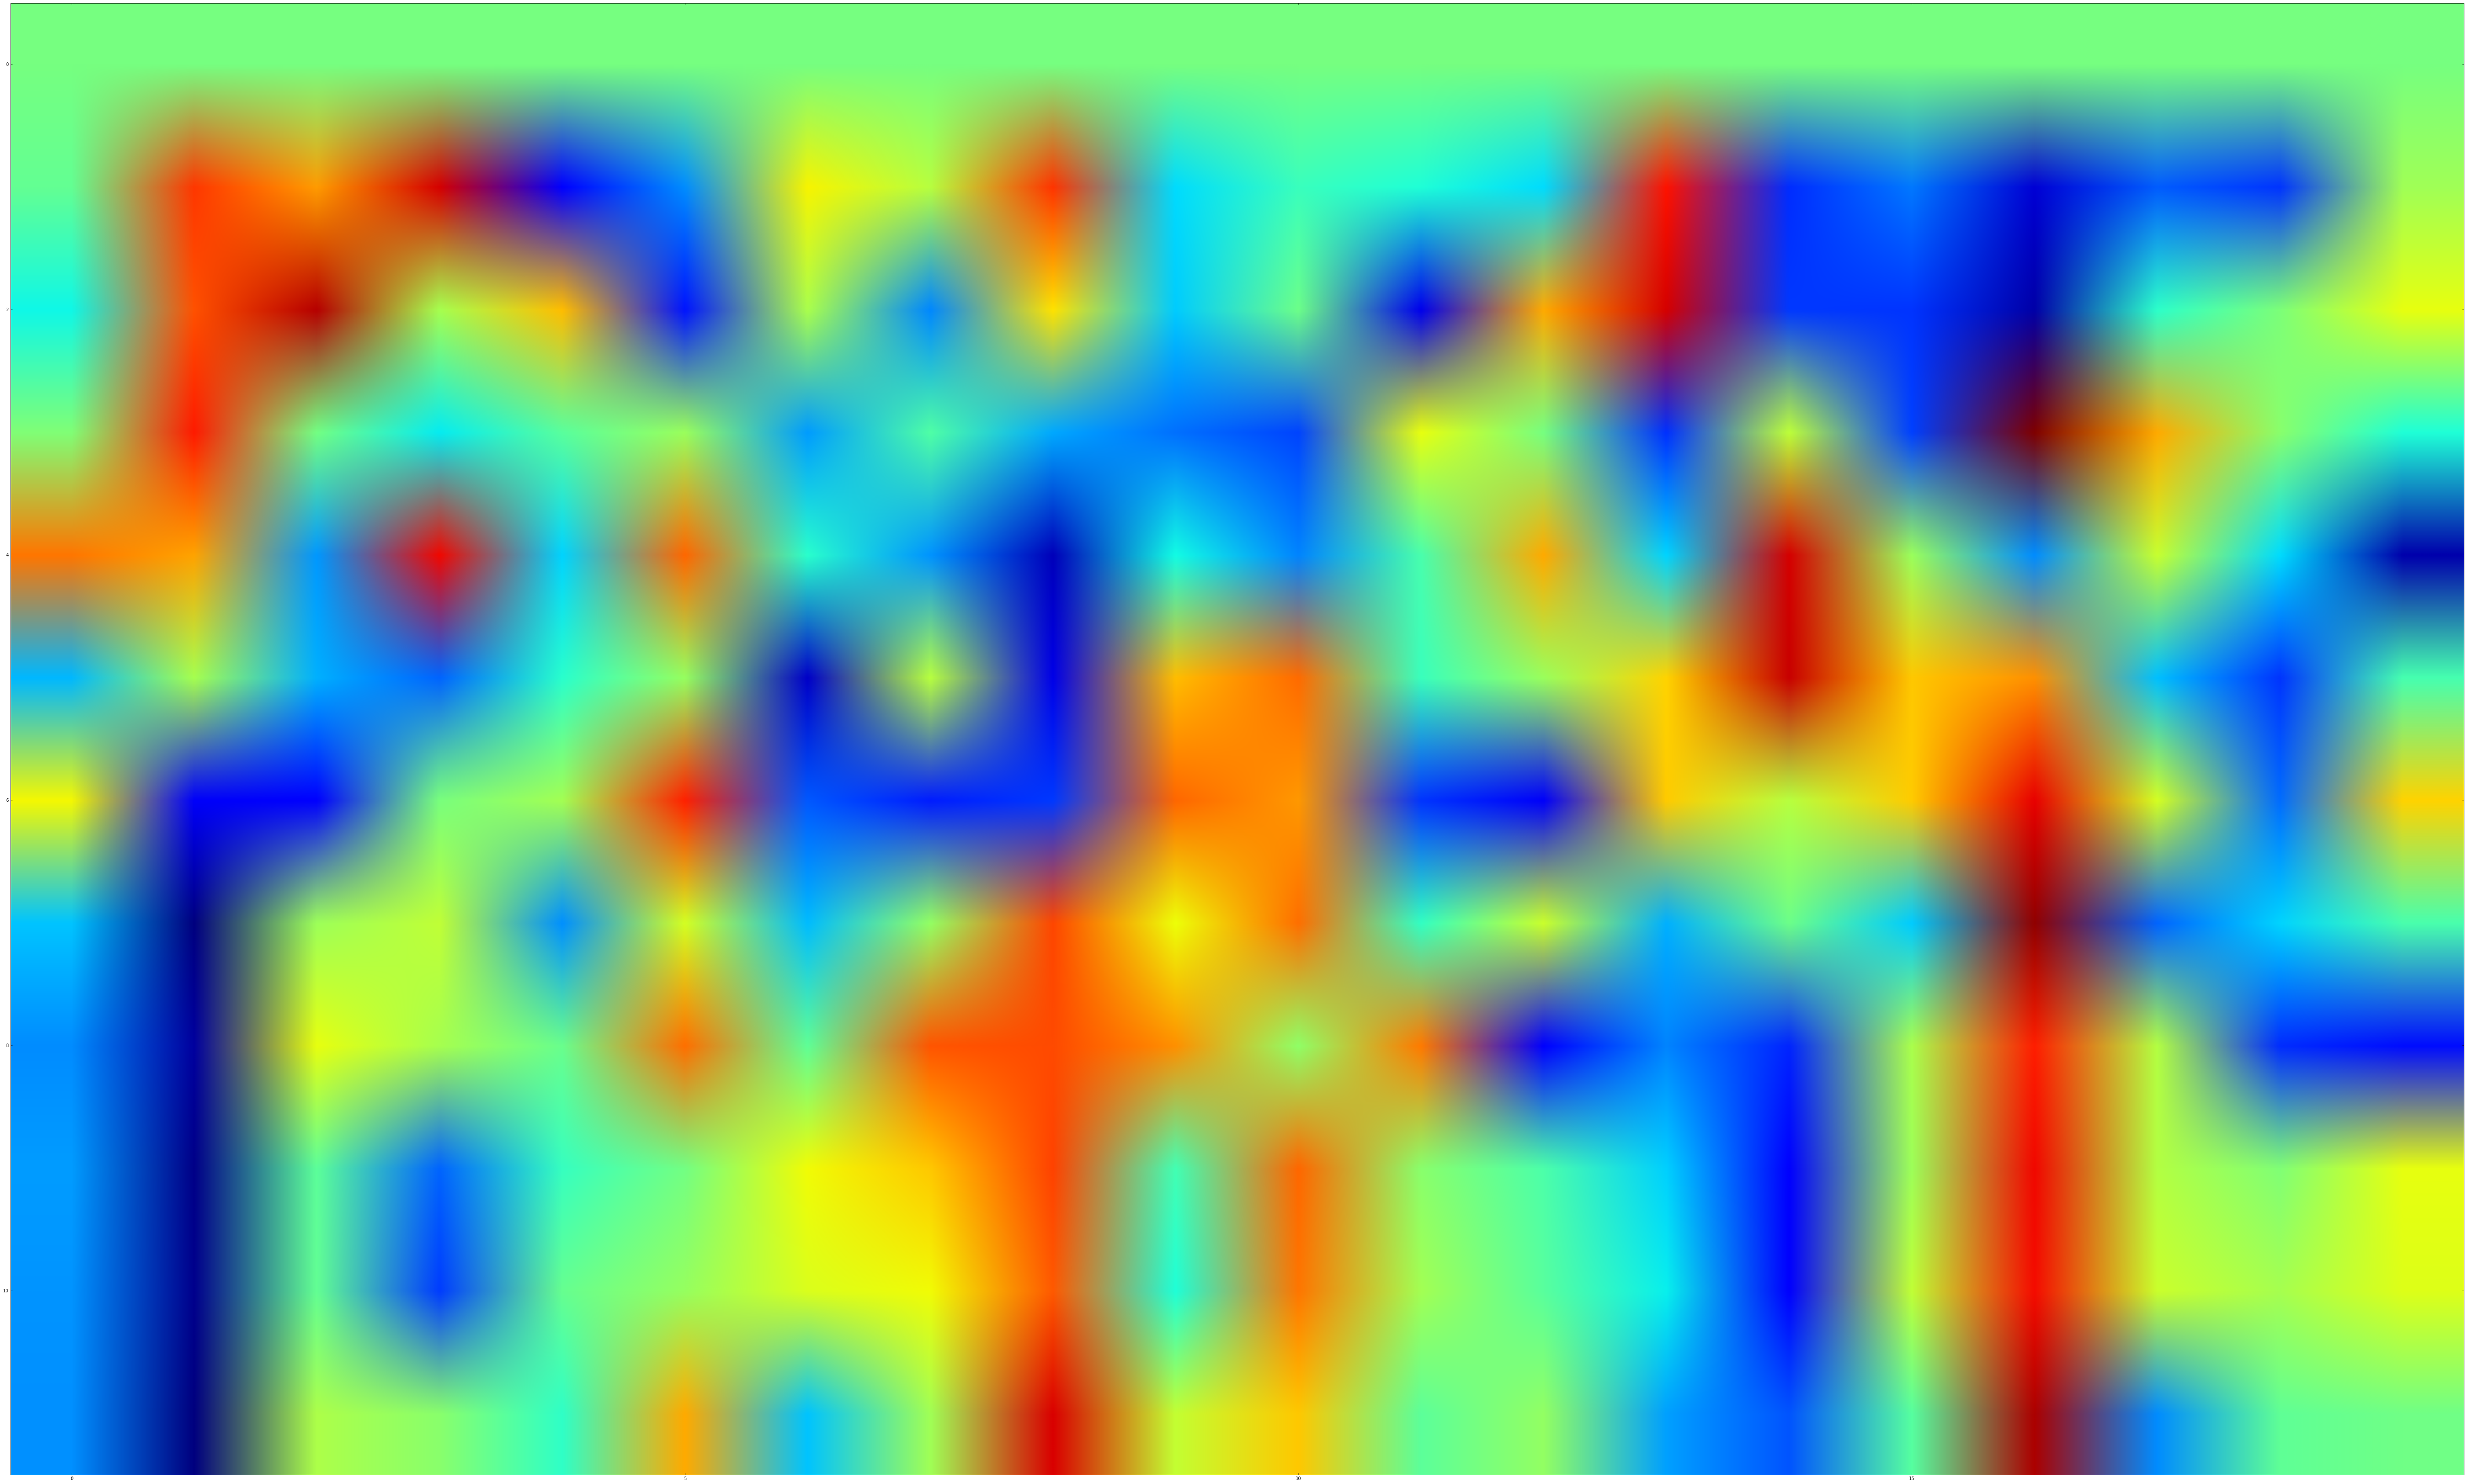

In [11]:
pl.figure(figsize=(100, 100))
pl.imshow(h_array)